## Práctica 10: Archivos
- **Objetivo:** Conocer e identificar los aspectos sobre los archivos, como las operaciones, el tipo de acceso y organización lógica.

- **Actividades:** Trabajar con operaciones, tipo de acceso y organización lógica de TDA archivo en algún lenguaje de programación.

- **Instrucciones:**
    • Simular un sistema de archivos utilizando un árbol B.

    • A partir del programa del árbol B realizado en la práctica pasada, crear un sistema de archivos que simule la organización lógica de un Sistema Operativo

    • El sistema de archivos debe manejar los niveles de acceso (pags. 29 y 30) y las operaciones básicas (pags. 31 y 32) que se mencionaron en la presentación del tema 5.
    
    • El sistema debe cumplir con las siguientes condiciones:
        - Tener mínimo 10 usuarios en el sistema con diferentes niveles de acceso
        - Tener mínimo 1,000 archivos en el árbol B con diferentes niveles de acceso para las operaciones básicas
        
    • Los usuarios, los permisos y la información de los archivos se deben leer de un archivo de texto plano (json, xml, csv, etc.)

In [1]:
import csv
import matplotlib.pyplot as plt

C Ó D I G O _ Á R B O L _ B

In [2]:
class Data:
    def __init__(self, key, value):
        self.key = key
        self.value = value

    def __str__(self):
        return str(self.key) + "->" + self.value

class BTreeNode:
    def __init__(self, t, leaf):
        # t es el grado mínimo del B-Tree, y leaf indica si el nodo es una hoja (True o False).       
        self.t = t  # Grado mínimo del B-Tree.
        self.keys = [None] * (2 * t - 1)  # Lista para almacenar claves en el nodo (máximo 2t - 1 claves).
        self.C = [None] * (2 * t)  # Lista de hijos (máximo 2t hijos).
        self.n = 0  # Número actual de claves en el nodo.
        self.leaf = leaf  # Si es una hoja o no.

    def insertNonFull(self, data, ):
        # Inserta una nueva clave en un nodo que no está lleno.
        i = self.n - 1  # Empieza desde la última clave en el nodo.

        if self.leaf:
            # Si el nodo es una hoja, las claves deben insertarse directamente en el nodo.

            while (i >= 0) and (self.keys[i].key > data.key):
                # Desplaza las claves hacia la derecha para hacer espacio para la nueva clave.

                self.keys[i + 1] = self.keys[i]
                i -= 1

            # Inserta la nueva clave en la posición correcta.
            self.keys[i + 1] = data
            self.n += 1  # Incrementa el número de claves en el nodo.
            
        else:
            # Si el nodo no es una hoja, busca el hijo correcto donde insertar la clave.

            while (i >= 0) and (self.keys[i].key > data.key):
                # Encuentra el hijo adecuado para la nueva clave.
                i -= 1

            # Si el hijo ya está lleno, hay que dividirlo.
            if self.C[i + 1].n == 2 * self.t - 1:
                self.splitChild(i + 1, self.C[i + 1])

                # Después de la división, decide cuál de los dos hijos usar para la inserción.
                if self.keys[i + 1].key < data.key:
                    i += 1

            # Inserta recursivamente en el hijo adecuado.
            self.C[i + 1].insertNonFull(data)

    def splitChild(self, i, y):
        # Divide el nodo hijo y crea un nuevo nodo.

        z = BTreeNode(y.t, y.leaf)  # Crea un nuevo nodo z.
        z.n = self.t - 1  # El nuevo nodo tendrá t - 1 claves.

        for j in range(self.t - 1):
            # Copia las últimas t - 1 claves de y a z.
            z.keys[j] = y.keys[j + self.t]

        if not y.leaf:
            # Si y no es una hoja, también copia los hijos correspondientes a z.
            for j in range(self.t):
                z.C[j] = y.C[j + self.t]

        y.n = self.t - 1  # Reduce el número de claves en y.

        for j in range(self.n, i, -1):
            # Mueve los punteros a los hijos en el nodo actual para hacer espacio para z.
            self.C[j + 1] = self.C[j]
        self.C[i + 1] = z  # Conecta el nuevo nodo z al nodo actual.

        for j in range(self.n - 1, i - 1, -1):
            # Mueve las claves en el nodo actual para hacer espacio para la nueva clave.
            self.keys[j + 1] = self.keys[j]
        self.keys[i] = y.keys[self.t - 1]  # Eleva la clave mediana de y al nodo actual.
        self.n += 1  # Incrementa el número de claves en el nodo actual.

    def traverse(self, l):
        # Realiza un recorrido en el B-Tree e imprime las claves.

        for i in range(self.n):
            
            if not self.leaf:
                # Si el nodo no es una hoja, visita el subárbol hijo antes de imprimir la clave.
                self.C[i].traverse(l + 1)
            print("\t" * l, l, self.keys[i].key, end=' ')
        print()

        if not self.leaf:
            # Visita el subárbol hijo que sigue después de imprimir las claves.
            self.C[i + 1].traverse(l + 1)

    def search(self, k):
        # Busca una clave en el B-Tree.
        i = 0
        while (i < self.n) and (k > self.keys[i].key):
            # Recorre las claves en el nodo hasta encontrar la clave o el lugar donde debería estar.
            i += 1

        if (i < self.n) and (k == self.keys[i].key):
            # Si encuentra la clave, la devuelve.
            return self.keys[i]

        if self.leaf:
            # Si llega a una hoja y no encuentra la clave, devuelve None (clave no encontrada).
            return None

        # Si no está en la hoja, busca recursivamente en el hijo adecuado.
        return self.C[i].search(k)
class BTree:
    # Esta clase representa el B-Tree en sí, que gestiona los nodos y proporciona operaciones
    # de búsqueda, inserción y recorrido.

    def __init__(self, t):
        # Constructor de la clase BTree.
        # Inicializa un B-Tree con grado mínimo t (número mínimo de claves por nodo).
        self.root = None  # La raíz del árbol comienza como None (árbol vacío).
        self.t = t  # Grado mínimo del B-Tree, se utiliza para determinar el tamaño máximo/mínimo de los nodos.

    def traverse(self):
        # Realiza un recorrido del árbol e imprime las claves.
        if self.root != None:
            # Si el árbol no está vacío, llama al método 'traverse' de la raíz.
            self.root.traverse(0)

    def search(self, k):
        # Busca una clave 'k' en el B-Tree.
        # Si el árbol está vacío (root es None), devuelve None.
        # Si no está vacío, llama al método 'search' del nodo raíz.
        return None if self.root == None else self.root.search(k)

    def insert(self, data):
        # Inserta un nuevo dato (par clave-valor) en el árbol.

        if self.root == None:
            # Si el árbol está vacío, crea un nuevo nodo raíz y lo convierte en una hoja.
            # El nuevo nodo contendrá el dato 'data' que se inserta.
            self.root = BTreeNode(self.t, True)  # Crea un nodo raíz que es una hoja.
            self.root.keys[0] = data  # Inserta el dato en la primera posición del nodo.
            self.root.n = 1  # El nodo ahora tiene una clave.

        else:
            # Si el árbol no está vacío, verifica si la raíz está llena (n == 2 * t - 1).
            if self.root.n == 2 * self.t - 1:
                # Si la raíz está llena, debe dividirse.

                # Crea un nuevo nodo 's' que se convierte en la nueva raíz.
                s = BTreeNode(self.t, False)  # El nuevo nodo no será una hoja.
                s.C[0] = self.root  # La antigua raíz se convierte en el primer hijo de 's'.

                # Divide el nodo raíz, y 's' tendrá dos hijos después de la división.
                s.splitChild(0, self.root)

                # Después de la división, decide cuál de los dos hijos debe recibir la nueva clave.
                i = 0
                if s.keys[0].key < data.key:
                    i += 1  # Si la clave en 'data' es mayor, se inserta en el hijo derecho.

                # Inserta el dato en el hijo adecuado de 's'.
                s.C[i].insertNonFull(data)

                # Actualiza la raíz del árbol a 's'.
                self.root = s

            else:
                # Si la raíz no está llena, inserta el dato directamente en la raíz.
                self.root.insertNonFull(data)



In [3]:
import random 
import string 
LENGTH_STR = 5
D = 2
values = [10, 27, 29, 17, 25, 21, 15, 31, 13, 51, 20, 24, 48, 19, 60, 35, 66]

def randstring(length):
    letters = string.ascii_lowercase
    result_str = "".join(random.choice(letters) for i in range(length)) 
    return result_str

if __name__ == '__main__':
    t = BTree(D)

    for value in values:
        t.insert(Data(value, randstring (LENGTH_STR)))

    t.traverse()
    print()

    k = 10
    prueba = t.search(k)
    
    print(prueba.value)


		 2 10 		 2 13 		 2 15 
	 1 17 
		 2 19 		 2 20 
 0 21 		 2 24 		 2 25 
	 1 27 
		 2 29 
 0 31 
		 2 35 		 2 48 
	 1 51 
		 2 60 		 2 66 

sujsd


L E E R _ U S U A R I O S

In [4]:
def leerUsuarios():
    listUsers = []
    with open("Usuarios.csv", "r") as usuarios:
        lectorUsuarios = csv.reader(usuarios)
        next(lectorUsuarios)
        for user in lectorUsuarios:
            listUsers.append(user)
    return listUsers

listUsers = leerUsuarios()
for i in listUsers:
    print(i)

['usuario1', 'pass1', 'lectura']
['usuario2', 'pass2', 'escritura']
['usuario3', 'pass3', 'ejecucion']
['usuario4', 'pass4', 'lectura']
['usuario5', 'pass5', 'actualizar']
['usuario6', 'pass6', 'cambiar_permisos']
['usuario7', 'pass7', 'borrar']
['usuario8', 'pass8', 'conocimiento']
['usuario9', 'pass9', 'ninguno']
['usuario10', 'pass10', 'agregar']
['owner', 'owner', 'owner']


L E E R _ A R C H I V O S

In [5]:
def leerArchivos():
    with open("Archivos.csv", "r") as archivos:
        lectorArchivos = csv.reader(archivos)
        #for file in lectorArchivos:
            #print(1)
leerArchivos()

I N S E R T A R _ E N _ B T R E E

In [6]:
import csv

def insert_from_csv(b_tree, file_name):
    with open(file_name, "r") as archivos:
        lectorArchivos = csv.reader(archivos)
        for lector in lectorArchivos:
            if len(lector) >= 9:
                key, value = lector[0].strip(), lector[1].strip()
                data = Data(key, value)
                b_tree.insert(data)

b_tree = BTree(3) 
insert_from_csv(b_tree, 'Archivos.csv')  
#b_tree.traverse()



B U S C A R _ A R C H I V O

In [7]:
def buscarArchivo():
    name = input("Ingresa el archivo a buscar: ")
    with open('Archivos.csv', 'r', newline="") as archivo:
        lector = csv.reader(archivo)
        next(lector)
        for linea in lector:
            if linea[0] == name:
                return f"Nombre{linea[0]}, contenido{linea[1]}"
        return "Archivo no encontrado"
    

N U E V O _ A R C H I V O

In [8]:
def nuevoArchivo():
    nombre = input("Nombre del archivo: ")
    contenido = input("Contenido del archivo: ")
    propietario = input("Propietario del archivo: ")
    print("Indique true or false")
    abrir = input("Abrir?").lower()
    crear = input("Crear?").lower()
    cerrar = input("Cerrar?").lower()
    lectura = input("Lectura?").lower()
    escritura = input("Escritura?").lower()
    borrar = input("Borrar?").lower()
    file = [nombre, contenido, propietario, abrir, crear, cerrar, lectura, escritura, borrar]
    return file

A G R E G A R _ A R C H I V O

In [9]:
def agregarArchivo(file):
    with open ("Archivos.csv", "a", newline="") as archivo:
        escritor = csv.writer(archivo)
        escritor.writerow(file)

E L I M I N A R _ A R C H I V O

In [10]:
def eliminarArchivo(file):
    filas = []
    with open("Archivos.csv", "r", newline="") as archivo:
        lector = csv.reader(archivo)
        for fila in lector:
            if fila[0] != file:
                filas.append(fila)
    
    with open("Archivos.csv", "w", newline="") as archivo:
        escritor = csv.writer(archivo)
        escritor.writerows(filas)


B U S C A R _ U S U A R I O

In [11]:
def buscarUsuario():
    global userValido
    global userInvalido
    name = input("Ingresa tu nombre de usuario: ")
    with open('Usuarios.csv', 'r', newline="") as archivo:
        lector = csv.reader(archivo)
        next(lector)
        for linea in lector:
            if linea[0] == name:
                password = input("Ingresa la contraseña: ")
                if linea[1] == password:
                    userValido += 1
                    print(f"Usuario encontrado: Nombre: {linea[0]}, Contraseña: {linea[1]}")
                    return linea
                else:
                    userInvalido += 1
                    print("Contraseña incorrecta")
                    return None
        print("Usuario no encontrado")
        return None

P E R M I S O S

In [12]:
def tiene_permiso(usuario, accion):
    permisos = {
        'buscar': ['lectura', 'ejecucion', 'owner'],
        'agregar': ['agregar', 'escritura', 'ejecucion', 'actualizar', 'owner'],
        'listar': ['lectura', 'owner'],
        'eliminar': ['borrar', 'actualizar', 'lectura', 'owner'],
        'estadisticas': ['lectura', 'owner']
    }
    return usuario[2] in permisos.get(accion, [])

E S T A D I S T I C A S _ P I E

Estadísticas de acceso: {'a b r i r': 494, 'c r e a r': 535, 'c e r r a r': 496, 'l e e r': 507, 'e s c r i b i r': 515, 'b o r r a r': 466}


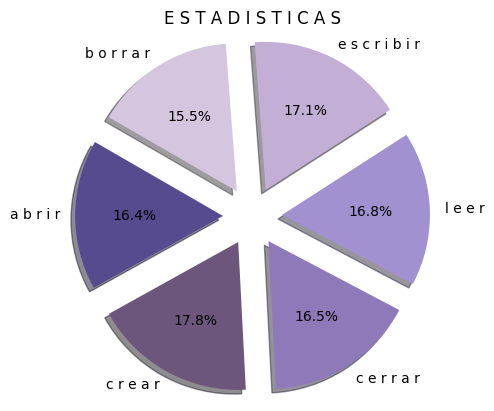

In [13]:
def pieAcceso():
    datos = {'a b r i r': 0, 'c r e a r': 0, 'c e r r a r': 0, 'l e e r': 0, 'e s c r i b i r': 0, 'b o r r a r': 0}

    with open('Archivos.csv', 'r', newline="") as archivo:
        lector = csv.reader(archivo)
        next(lector)  # Saltar la cabecera
        for linea in lector:
            permisos = {
                'a b r i r': linea[3].lower() == 'true',
                'c r e a r': linea[4].lower() == 'true',
                'c e r r a r': linea[5].lower() == 'true',
                'l e e r': linea[6].lower() == 'true',
                'e s c r i b i r': linea[7].lower() == 'true',
                'b o r r a r': linea[8].lower() == 'true'
            }
            for permiso, valor in permisos.items():
                if valor:  
                    datos[permiso] += 1 
    print("Estadísticas de acceso:", datos)
    labels = datos.keys() 
    sizes = datos.values() 
    colores = ['#574b90', '#6c567b', '#8e79b9', '#a191d0', '#c3aed6', '#d5c6e0']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=150, colors = colores, 
            shadow = True, explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2));
    plt.title("E S T A D I S T I C A S")
    plt.show()
    
pieAcceso()

E S T A D I S T I C A S _ B A R R A S

In [14]:
def barrasInicio():
    global datosInicioSesion
    x = ['v a l i d o s', 'i n v a l i d o s']
    y = datosInicioSesion
    colors = ['#6c567b', '#d5c6e0']
              
    plt.subplot()
    plt.bar(x = x, height = y, color = colors)
    plt.title("I N I C I O S  D E  S E S I O N")
    plt.show()


M A I N

In [15]:
def main():
    global userValido
    global userInvalido
    global datosInicioSesion
    
    datosInicioSesion = [userValido, userInvalido]
    
    opcionInicio = 0
    while opcionInicio != 2:
        print("===== M E N U =====")
        print("1) Iniciar sesión")
        print("2) Salir")
        opcionInicio = int(input("\nElige "))
        
        match opcionInicio:
            case 1:
                usuario = buscarUsuario()
                if usuario:
                    userValido += 1
                    datosInicioSesion = [userValido, userInvalido]
                    if usuario[2] == 'ninguno':
                        print("Acceso denegado")
                        continue
                    elif usuario[2] == 'conocimiento':
                        print("Directorio de Estrella")
                        continue
                    else:
                        opcion = 0
                        while opcion != 6: 
                            print("===== M E N U =====")
                            print("1) Buscar archivo")
                            print("2) Agregar archivo")
                            print("3) Listar archivos")
                            print("4) Mostrar estadísticas")
                            print("5) Eliminar archivo") 
                            print("6) Cerrar sesión") 
                            opcion = int(input("\n\tOpción: "))

                            match opcion:
                                case 1:  # Buscar archivo
                                    if tiene_permiso(usuario, 'buscar'):
                                        print(buscarArchivo())
                                    else:
                                        print("\tNo tienes permiso para buscar archivos.")

                                case 2:  # Agregar archivo
                                    if tiene_permiso(usuario, 'agregar'):
                                        file = nuevoArchivo()
                                        agregarArchivo(file)
                                    else:
                                        print("\tNo tienes permiso para agregar archivos.")

                                case 3:  # Listar archivos
                                    if tiene_permiso(usuario, 'listar'):
                                        leerArchivos()
                                    else:
                                        print("\tNo tienes permiso para leer archivos.")

                                case 4:  # Mostrar estadísticas
                                    pieAcceso()
                                    barrasInicio()

                                case 5:  # Eliminar archivo
                                    #if tiene_permiso(usuario, 'eliminar'): 
                                    #    archivoEliminar = input("\n\tNombre del archivo a eliminar: ")
                                    #    eliminarArchivo(archivoEliminar)
                                    #else:
                                    #    print("\tNo tienes permiso para eliminar archivos.")
                                    print("Por el momento la funcion eliminar no esta disponible")

                                case 6:  # Cerrar sesión
                                    print("\tCerrar sesión")
                                    break  
                                case _:  # Opción no válida
                                    print("\tOpción no válida")
                else:
                    userInvalido += 1
                    print("usuario no valido")
                    datosInicioSesion = [userValido, userInvalido]
    print("BYEEEEEEE")

userValido = 0
userInvalido = 0
listUsers = leerUsuarios()
main()

===== M E N U =====
1) Iniciar sesión
2) Salir


Usuario no encontrado
usuario no valido
===== M E N U =====
1) Iniciar sesión
2) Salir
BYEEEEEEE


**Conclusiones:** En lo personal, la realización de esta práctica fue mi favorita, fue bastante entretenido realizar las funciones y verificaciones, además de los archivos que hay y el diseño de las gráficas de estadisticas. Todo esto fue "sencillo" debido a que ya había hecho un ejercicio similar en otro curso. Por otro lado, irónicamente lo más complejo fue la inserción en el árbol B, ya que debía verificar varias cosas.

Considero que el objetivo de conocer e identificar los aspectos sobre los archivos, como las operaciones, el tipo de acceso y organización lógica se cumplió satisfactoriamente. 